In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

In [2]:
plt.rcParams.update({'font.size': 16, 'text.usetex': True})

## FUNCTIONS

In [3]:
#Here is where we define the 3-body problem


def df_3body_ast(vec,t,M1,M2,M3,G):
    x1 = vec[0]
    y1 = vec[1]
    z1 = vec[2]
    vx1 = vec[3]
    vy1 = vec[4]
    vz1 = vec[5]
    x2 = vec[6]
    y2 = vec[7]
    z2 = vec[8]
    vx2 = vec[9]
    vy2 = vec[10]
    vz2 = vec[11]
    x3 = vec[12]
    y3 = vec[13]
    z3 = vec[14]
    vx3 = vec[15]
    vy3 = vec[16]
    vz3 = vec[17]
    
    #Distance functions
    
    x12 = x2 - x1
    y12 = y2- y1
    z12 = z2 - z1
    x13 = x3 - x1
    y13 = y3- y1
    z13 = z3 - z1
    x23 = x3 - x2
    y23 = y3 - y2
    z23 = z3 - z2
    
    r12 = np.sqrt(x12**2+y12**2+z12**2)
    r13 = np.sqrt(x13**2+y13**2+z13**2)
    r23 = np.sqrt(x23**2+y23**2+z23**2)
    x21, y21, z21, r21 = (-x12, -y12, -z12, r12)
    x31, y31, z31, r31 = (-x13, -y13, -z13, r13)
    x32, y32, z32, r32 = (-x23, -y23, -z23, r23)

    
    #Force and velocity stuff
    
    dvec = np.zeros(len(vec))
    dvec[0] = vx1
    dvec[1] = vy1
    dvec[2] = vz1
    dvec[3] = G * M2 / r12**3 * x12 + G * M3 / r13**3 * x13
    dvec[4] = G * M2 / r12**3 * y12 + G * M3 / r13**3 * y13
    dvec[5] = G * M2 / r12**3 * z12 + G * M3 / r13**3 * z13
    dvec[6] = vx2
    dvec[7] = vy2
    dvec[8] = vz2
    dvec[9] = G * M1 / r21**3 * x21 + G * M3 / r23**3 * x23
    dvec[10] = G * M1 / r21**3 * y21 + G * M3 / r23**3 * y23
    dvec[11] = G * M1 / r21**3 * z21 + G * M3 / r23**3 * z23
    dvec[12] = vx3
    dvec[13] = vy3
    dvec[14] = vz3
    dvec[15] = G * M1 / r31**3 * x31 + G * M2 / r32**3 * x32
    dvec[16] = G * M1 / r31**3 * y31 + G * M2 / r32**3 * y32
    dvec[17] = G * M1 / r31**3 * z31 + G * M2 / r32**3 * z32
    return dvec

In [4]:
#This will correct the orbits so that it follow the Center of Mass 

def CoM(vec0, M1, M2, M3):
    marr = np.array([M1, M2, M3])
    rarr = np.array([vec0[6*i:6*i+3] for i in range(3)])
    varr = np.array([vec0[6*i+3:6*i+6] for i in range(3)])
    
    rcom = np.dot(marr, rarr) / np.sum(marr)
    vcom = np.dot(marr, varr) / np.sum(marr)
    
    rarr = rarr - rcom
    varr = varr - vcom
    
    vec0 = np.array([rarr[0], varr[0], rarr[1], varr[1], rarr[2], varr[2]]).flatten()
    return vec0

In [5]:
# Rotating Frame

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def rot(vec):
    x1 = vec[:,0]
    y1 = vec[:,1]
    x2 = vec[:,6]
    y2 = vec[:,7]
    x3 = vec[:,12]
    y3 = vec[:,13]
    
    r1, p1 = cart2pol(x1,y1)
    r2, p2 = cart2pol(x2,y2)
    r3, p3 = cart2pol(x3,y3)
    
    p1 = p1 - p2
    p3 = p3 - p2
    p2 = 0
    
    x1, y1 = pol2cart(r1,p1)
    x2, y2 = pol2cart(r2,p2)
    x3, y3 = pol2cart(r3,p3)
    
    
    vec[:,0] = x1
    vec[:,1] = y1
    vec[:,6] = x2
    vec[:,7] = y2
    vec[:,12] = x3
    vec[:,13] = y3
    
    return vec



In [6]:
def plot(vec):
    x1, y1, z1, vx1, vy1, vz1 = vec[:,0], vec[:,1], vec[:,2], vec[:,3], vec[:,4], vec[:,5] 
    x2, y2, z2, vx2, vy2, vz2 = vec[:,6], vec[:,7], vec[:,8], vec[:,9], vec[:,10], vec[:,11]
    x3, y3, z3, vx3, vy3, vz3 = vec[:,12], vec[:,13], vec[:,14], vec[:,15], vec[:,16], vec[:,17]

    print('3')
    
    plt.figure(figsize = (20, 10))
    plt.plot(x1, y1, label = "Object 1")
    plt.plot(x2, y2, label = "Object 2")
    
    print('uwu')
    
    plt.plot(x3, y3, label = "Orbit")
    #plt.ylim(-1, 1)
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    
    print('OwO')
    plt.gca().set_aspect('equal')
    plt.legend(loc = 2)
    plt.show()
    
    print('Kill me')
    return None

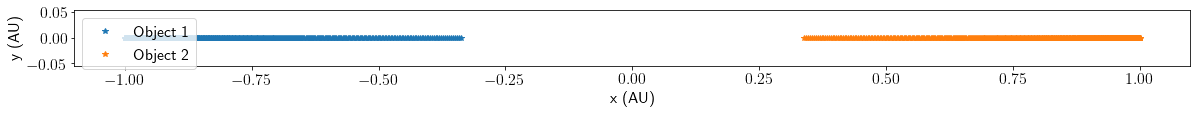

In [11]:
# Test Case

M1, M2, M3, G = np.ones(4)

vec0 = np.zeros(18)
vec0[0] = -1
vec0[3] = 0
vec0[4] = 0
vec0[6] = 1
vec0[9] = 0
vec0[10] = 0
vec0[15] = 0
vec0[16] = 0

tarr = np.linspace(0,0.9,500)
ans = integrate.odeint(df_3body_ast, vec0, tarr, args = (M1,M2,M3,G))
plot(ans)

## TEST

## REMOVE E LATER

In [11]:
M1, M2, M3, G = 1, 1e-3, 0, 4 * np.pi**2 

r = 1
M = M1 + M2
r1 = M2 / M * r
r2 = M1 / M * r
P = np.sqrt(r**3 / M)
v = np.sqrt(G * M / r)
v1 = M2 / M * v
v2 = M1 / M * v

r3 = r*(1+(5/12)*(M2/(M1+M2)))

v3 =  2*np.pi*r3/P #L3


vec0 = np.zeros(18)
vec0[0] = r1
vec0[3] = 0
vec0[4] = v1
vec0[6] = -r2
vec0[9] = 0
vec0[10] = -v2
vec0[12] = r3
vec0[15] = 0
vec0[16] = v3

#vecCM = CoM(vec0, M1, M2, M3)

time = np.linspace(0, P, 500)

ans = integrate.odeint(df_3body_ast, vec0, time, args = (M1, M2, M3, G))

vecRT = rot(ans)

3
uwu
OwO


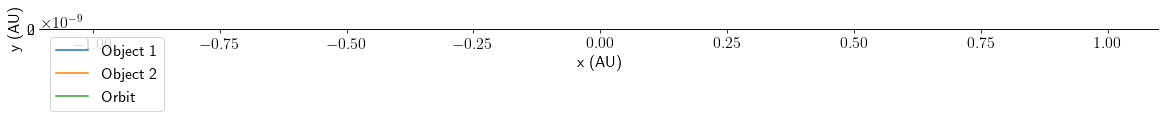

Kill me


In [13]:
plot(ans)

In [60]:
M1,M2,M3, G = np.ones(4)
p1 = 0.416822
p2 = 0.330333

vec0 = np.zeros(18)
vec0[0] = -1
vec0[3] = p1
vec0[4] = p2
vec0[6] = 1
vec0[9] = p1
vec0[10] = p2
vec0[15] = -2*p1
vec0[16] = -2*p2

tarr = np.linspace(0, P, 10000)
ans = integrate.odeint(df_3body_ast, vec0, tarr, args=(M1, M2, M3,G))

x1 = ans[:,0]
y1 = ans[:,1]
x2 = ans[:,6]
y2 = ans[:,7]

#The Plot
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()

NameError: name 'P' is not defined

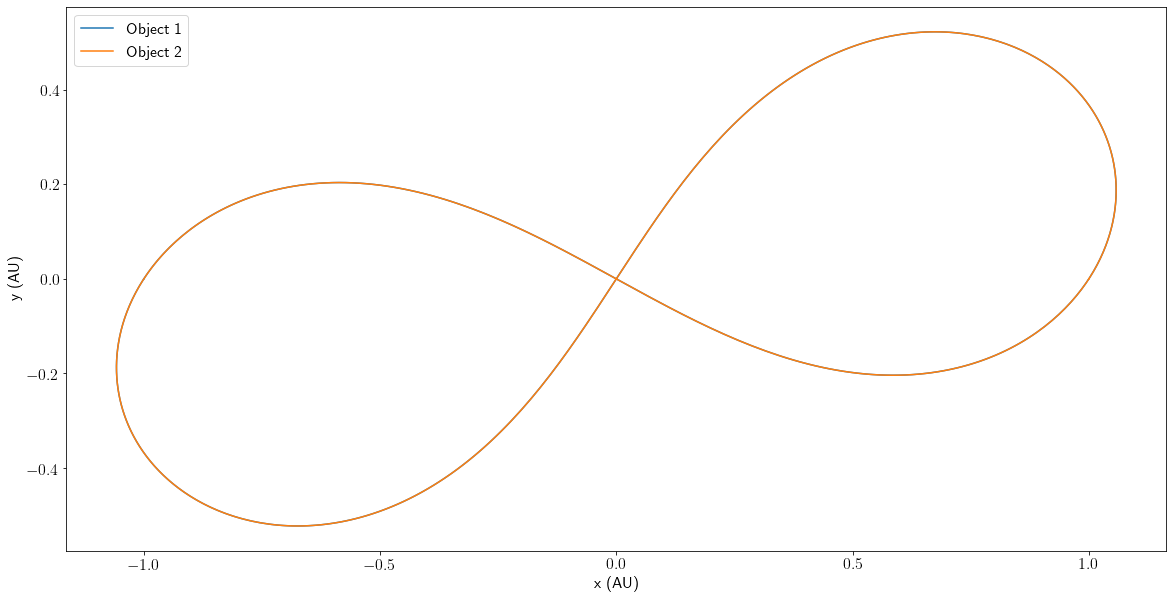

In [19]:
M1, M2, M3, G = np.ones(4)
p1 = 0.34711
p2 = 0.532728

vec0 = np.zeros(18)
vec0[0] = -1
vec0[3] = p1
vec0[4] = p2
vec0[6] = 1
vec0[9] = p1
vec0[10] = p2
vec0[15] = -2*p1
vec0[16] = -2*p2

#vecCM = CoM(vec0, M1, M2, M3)

time = np.linspace(0, 6.32449, 500)

vecCM = integrate.odeint(df_3body_ast, vec0, time, args = (M1, M2, M3, G))
plot(vecCM)

In [19]:
r3 = -r2
v3 = v2

x3 = r3 * np.cos(np.pi/3)
y3 = r3 * np.sin(np.pi/3)
vx3 = -v3 * np.sin(np.pi/3)
vy3 = v3 * np.cos(np.pi/3)

vec3 = np.array([x3,y3,0,vx3,vy3,0])

vec0 = CoM(vec0, M1, M2, M3)
tarr = np.linspace(0, P, 10000)
ans = integrate.odeint(df_3body_ast, vec0, tarr, args=(M1, M2, M3))



TypeError: df_3body_ast() missing 1 required positional argument: 'G'

In [31]:
#Plot for L3

x1 = veclist[:,0]
y1 = veclist[:,1]
x2 = veclist[:,6]
y2 = veclist[:,7]
x3 = veclist[:,12]
y3 = veclist[:,13]

#The Plot
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()

NameError: name 'vec' is not defined

In [6]:
def plot_orbits(vec, legend=True):
    
    x1 = vec[:,0]
    y1 = vec[:,1]
    x2 = vec[:,6]
    y2 = vec[:,7]
    x3 = vec[:,12]
    y3 = vec[:,13]

    f = plt.figure(figsize=(8,8))
    plt.plot(x1, y1, label='$M_1$')
    plt.plot(x2, y2, label='$M_2$')
    plt.plot(x3, y3, label='$M_3$')
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.title('Orbits')
    plt.gca().set_aspect('equal')
    if plt.ylim()[0]>-0.5: plt.ylim(-0.5,plt.ylim()[1])
    if plt.ylim()[1]<0.5: plt.ylim(plt.ylim()[0], 0.5)
    if legend: plt.legend()
    
    f.tight_layout()
    
    return f